<b>Programming Exercise 6 | Support Vector Machines </b>

In this exercise, we will be using support vector machines (SVMs) to build a spam classifier. 

In [4]:
import os 
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

import scipy
from scipy.io import loadmat
from sklearn import svm

In [5]:
os.chdir('/Users/christinakouride/Documents/Python/Learning/Andrew Ng - ML course/ex6')

data1 = scipy.io.loadmat('ex6data1.mat')
data2 = scipy.io.loadmat('ex6data2.mat')
data3 = scipy.io.loadmat('ex6data3.mat')

In [6]:
data1.keys()
data2.keys()
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [7]:
X1 = data1['X']
Y1 = data1['y']

X2 = data2['X']
Y2 = data2['y']

X3train = data3['X']
Y3train = data3['y']

X3val = data3['Xval']
Y3val = data3['yval']

<b> 1 | Support Vector Machines </b>

<b> 1.1 | Example Dataset 1 </b>

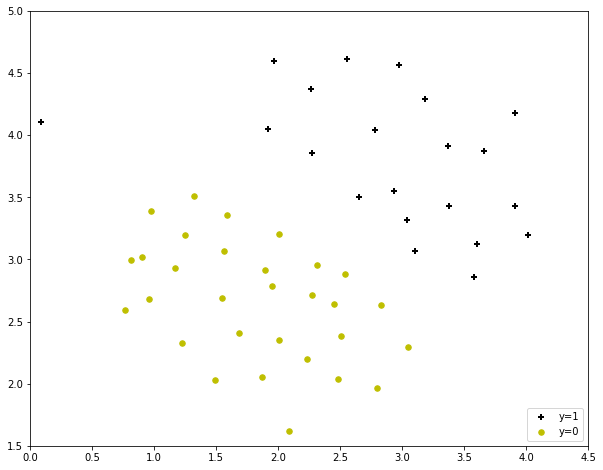

In [8]:
#plot data
ipos = Y1[:,0] == 1
ineg = Y1[:,0] == 0

plt.figure(figsize=(10,8))
plt.scatter(X1[ipos][:,0], X1[ipos][:,1], marker='+', c='k', s=40, linewidth=2, label="y=1")
plt.scatter(X1[ineg][:,0], X1[ineg][:,1], marker='o', c='y', s=30, label="y=0")

plt.ylim(1.5,5)
plt.xlim(0,4.5)

plt.legend(loc=4)

In [9]:
#sklearn SVM automatically adds the extra feature x0 = 1 and takes care of the learning intercept theta0
clf_1 = svm.SVC(kernel = 'linear', C=1, decision_function_shape = 'ovr' )
clf_1.fit(X1, Y1.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

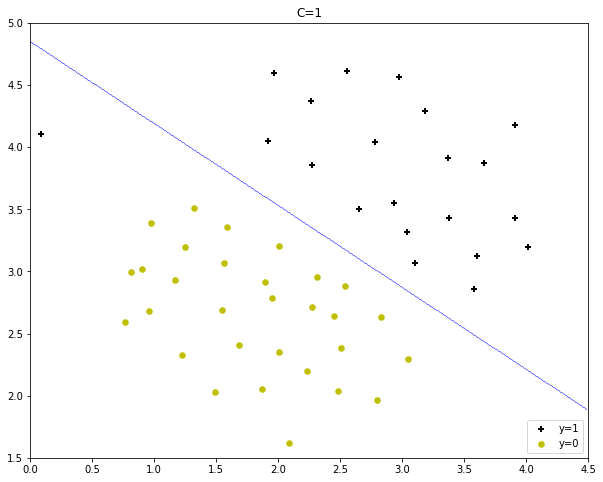

In [14]:
xx1, xx2 = np.meshgrid( np.arange(0.0, 4.5, 0.01), np.arange(1.5, 5.0, 0.01) )

Z = clf_1.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

#plot decision boundary
plt.figure(figsize=(10,8))
plt.contour(xx1, xx2, Z, [0.5], linewidths=0.5, colors='b')

#plot raw data
ipos = Y1[:,0] == 1
ineg = Y1[:,0] == 0

plt.scatter(X1[ipos][:,0], X1[ipos][:,1], marker='+', c='k', s=40, linewidth=2, label="y=1")
plt.scatter(X1[ineg][:,0], X1[ineg][:,1], marker='o', c='y', s=30, label="y=0")

plt.title('C=1')
plt.ylim(1.5,5)
plt.xlim(0,4.5)

plt.legend(loc=4)

In [13]:
#the SVM misclassifies the data point on the far left. Increase C to reduce underfitting (increase variance)
clf_2 = svm.SVC(kernel = 'linear', C=100, decision_function_shape = 'ovr' )
clf_2.fit(X1, Y1.ravel())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

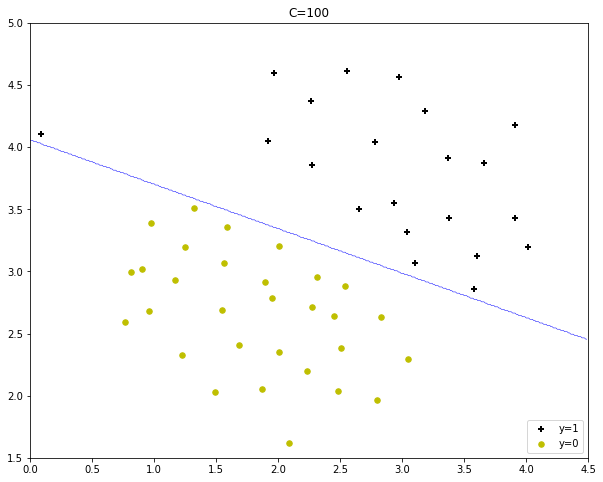

In [15]:
Z = clf_2.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

#plot decision boundary
plt.figure(figsize=(10,8))
plt.contour(xx1, xx2, Z, [0.5], linewidths=0.5, colors='b')

#plot raw data
ipos = Y1[:,0] == 1
ineg = Y1[:,0] == 0

plt.scatter(X1[ipos][:,0], X1[ipos][:,1], marker='+', c='k', s=40, linewidth=2, label="y=1")
plt.scatter(X1[ineg][:,0], X1[ineg][:,1], marker='o', c='y', s=30, label="y=0")

plt.title('C=100')
plt.ylim(1.5,5)
plt.xlim(0,4.5)

plt.legend(loc=4)

<b> 1.2 | SVM with Gaussian Kernels </b>

<b> 1.2.1 | Gaussian Kernel </b>

In [18]:
def guassianKernel(x1, x2, sigma):
    Kgas = np.exp(-np.sum((x1-x2)**2)/(2*sigma**2))
    return Kgas

In [19]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

guassianKernel(x1, x2, sigma)

0.32465246735834974

<b> 1.2.2 | Example Dataset 2 </b>

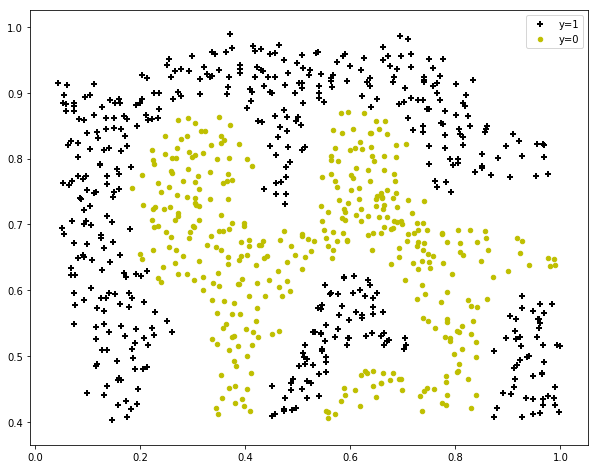

In [28]:
#plot data
ipos = Y2[:,0] == 1
ineg = Y2[:,0] == 0

plt.figure(figsize=(10,8))
plt.scatter(X2[ipos][:,0], X2[ipos][:,1], marker='+', c='k', s=40, linewidth=2, label="y=1")
plt.scatter(X2[ineg][:,0], X2[ineg][:,1], marker='o', c='y', s=20, label="y=0")

plt.legend(loc=1)

In [21]:
sigma = 0.1
clf_3 = svm.SVC(kernel = 'rbf', gamma = 1/(2*sigma**2), C=1, decision_function_shape = 'ovr')
clf_3.fit(X2, Y2.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

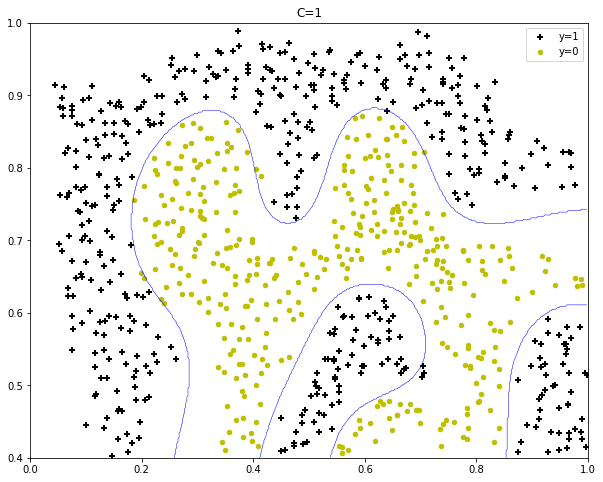

In [27]:
xx1, xx2 = np.meshgrid( np.arange(0.0, 1.0, 0.002), np.arange(0.4, 1.0, 0.002) )

Z = clf_3.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

#plot decision boundary
plt.figure(figsize=(10,8))
plt.contour(xx1, xx2, Z, [0.5], linewidths=0.5, colors='b')

#plot raw data
ipos = Y2[:,0] == 1
ineg = Y2[:,0] == 0

plt.scatter(X2[ipos][:,0], X2[ipos][:,1], marker='+', c='k', s=40, linewidth=2, label="y=1")
plt.scatter(X2[ineg][:,0], X2[ineg][:,1], marker='o', c='y', s=20, label="y=0")

plt.title('C=1')
plt.ylim(0.4,1.0)
plt.xlim(0,1.0)

plt.legend(loc=1)

<b> 1.2.3 | Example Dataset 3</b>

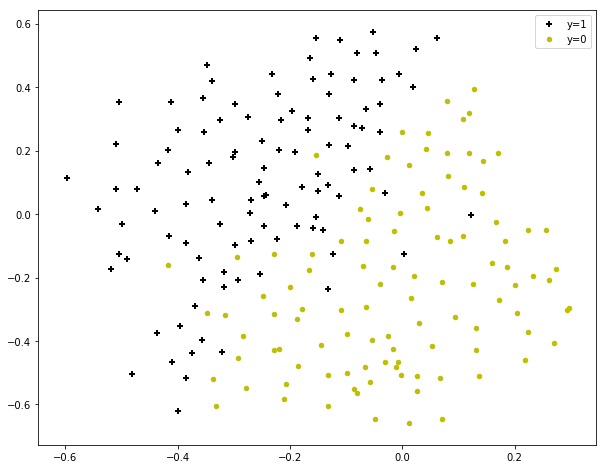

In [26]:
#plot data
ipos = Y3train[:,0] == 1
ineg = Y3train[:,0] == 0

plt.figure(figsize=(10,8))
plt.scatter(X3train[ipos][:,0], X3train[ipos][:,1], marker='+', c='k', s=40, linewidth=2, label="y=1")
plt.scatter(X3train[ineg][:,0], X3train[ineg][:,1], marker='o', c='y', s=20, label="y=0")

plt.legend(loc=1)

In [29]:
def dataset3Params(X3train, Y3train, X3val, Y3val):
    C = np.array([0.01,0.03,0.1,0.3,1,3,10,15,20,25,30,35])
    sigma = np.array([0.01,0.03,0.1,0.3,1,3,10,15,20,25,30,35])
    
    error_val = []
    params = []
    
    for i in C:
        for j in sigma:
            clf = svm.SVC(kernel = 'rbf', gamma = 1/(2*j**2), C = i, decision_function_shape = 'ovr')
            clf.fit(X3train, Y3train.ravel())
            
            #returns mean accuracy of the test
            error_val.append([clf.score(X3val, Y3val.ravel())])
            params.append([i,j])
    
    return error_val, params

In [30]:
error_val, params = dataset3Params(X3train, Y3train, X3val, Y3val)

imax = np.argmax(error_val)

c_max, sigma_max = params[imax]

print("Optimum sigma:", sigma_max)
print("Optimum C:",c_max)

Optimum sigma: 0.1
Optimum C: 1.0


In [31]:
clf_4 = svm.SVC(kernel = 'rbf', gamma = 1/(2*sigma_max**2), C=c_max, decision_function_shape = 'ovr')
clf_4.fit(X3train, Y3train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

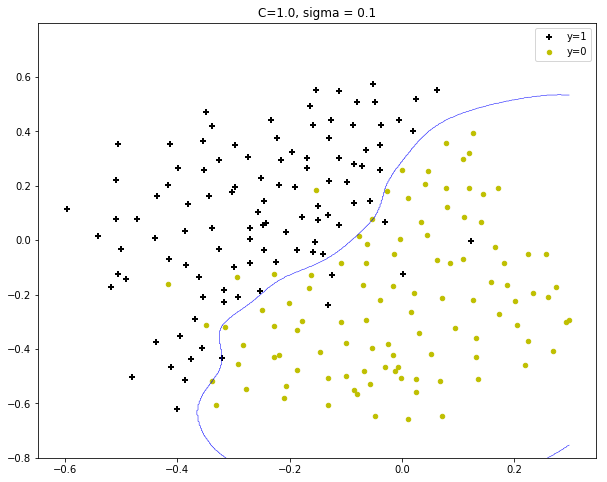

In [33]:
xx1, xx2 = np.meshgrid( np.arange(-0.6, 0.3, 0.002), np.arange(-0.8, 0.8, 0.002) )

Z = clf_4.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

#plot decision boundary
plt.figure(figsize=(10,8))
plt.contour(xx1, xx2, Z, [0.5], linewidths=0.5, colors='b')

#plot raw data
ipos = Y3train[:,0] == 1
ineg = Y3train[:,0] == 0

plt.scatter(X3train[ipos][:,0], X3train[ipos][:,1], marker='+', c='k', s=40, linewidth=2, label="y=1")
plt.scatter(X3train[ineg][:,0], X3train[ineg][:,1], marker='o', c='y', s=20, label="y=0")


plt.title('C=1.0, sigma = 0.1')

plt.legend(loc=1)

<b> 2 | Spam Classification

<b> 2.3 | Training SVM for Spam Classification</b>

In [34]:
data_spam = scipy.io.loadmat('spamTrain.mat')
data_test = scipy.io.loadmat('spamTest.mat')

print('data_spam.keys() = ',data_spam.keys())
print('data_test.keys() = ',data_test.keys())

data_spam.keys() =  dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
data_test.keys() =  dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])


In [35]:
X_spam = data_spam['X']
Y_spam = data_spam['y']

X_test = data_test['Xtest']
Y_test = data_test['ytest']

print('X_spam shape: ',X_spam.shape)
print('Y_spam shape: ',Y_spam.shape)
print('X_test shape: ',X_test.shape)
print('Y_test shape: ',Y_test.shape)

X_spam shape:  (4000, 1899)
Y_spam shape:  (4000, 1)
X_test shape:  (1000, 1899)
Y_test shape:  (1000, 1)


In [36]:
clf_5 = svm.SVC(kernel = 'linear', C = 0.1, decision_function_shape = 'ovr')
clf_5.fit(X_spam, Y_spam.ravel())

acc_train = clf_5.score( X_spam, Y_spam.ravel() )
acc_test = clf_5.score( X_test, Y_test.ravel() )

print('Training accuracy: ',round(acc_train*100,1),'%')
print('Test accuracy: ',round(acc_test*100,1),'%')

Training accuracy:  99.8 %
Test accuracy:  98.9 %


<b>2.4 | Top Predictors for Spam</b>

In [37]:
from sklearn.feature_extraction import DictVectorizer
w = clf_5.coef_
top10 = np.argsort(w)[-10:]
print(top10)

[[1560 1665 1764 ... 1397  297 1190]]
